## Booking Channels and Market Segment Analysis
 ***Are there noticeable and useful facts from Distribution Channels and Market Segments?***

In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from local storage into a pandas dataframe
htb = pd.read_csv(r"C:/Users/HP/Documents/Azeez/Hotel Booking Analysis/hotel_bookings_clean.csv")

In [3]:
# Set all columns to show
pd.set_option('display.max_columns', None)
# Preview data
htb.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date
0,Resort Hotel,0,342,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24
1,Resort Hotel,0,737,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24
2,Resort Hotel,0,7,0,1,1,0,0,Bed & Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No agent,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24
3,Resort Hotel,0,13,0,1,1,0,0,Bed & Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18
4,Resort Hotel,0,14,0,2,2,0,0,Bed & Breakfast,GBR,Online TA,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,240.0,Not provided,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17


In [4]:
htb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   stays_in_weekend_nights         87396 non-null  int64  
 4   stays_in_week_nights            87396 non-null  int64  
 5   adults                          87396 non-null  int64  
 6   children                        87396 non-null  int64  
 7   babies                          87396 non-null  int64  
 8   meal                            87396 non-null  object 
 9   country                         87396 non-null  object 
 10  market_segment                  87396 non-null  object 
 11  distribution_channel            87396 non-null  object 
 12  is_repeated_guest               

In [5]:
# Change datatype of columns 'reservation_status_date', 'arrival_date', 'booking_date' to datetime
htb['reservation_status_date'] = pd.to_datetime(htb['reservation_status_date'])
htb['arrival_date'] = pd.to_datetime(htb['arrival_date'])
htb['booking_date'] = pd.to_datetime(htb['booking_date'])

# Re-check datatypes
htb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   stays_in_weekend_nights         87396 non-null  int64         
 4   stays_in_week_nights            87396 non-null  int64         
 5   adults                          87396 non-null  int64         
 6   children                        87396 non-null  int64         
 7   babies                          87396 non-null  int64         
 8   meal                            87396 non-null  object        
 9   country                         87396 non-null  object        
 10  market_segment                  87396 non-null  object        
 11  di

***Q1: Which distribution channel contributes the most bookings?***

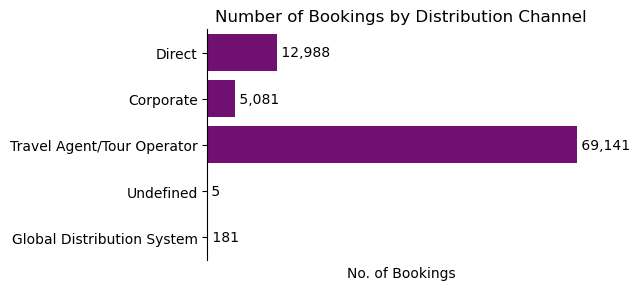

In [6]:
# Set plot size
plt.figure(figsize=(5,3))

# Plot bar chart
chn_bkns = sns.countplot(data=htb, y='distribution_channel', color='Purple')
plt.bar_label(chn_bkns.containers[0], fmt=' {:,.0f}') # add bar label

# Plot styling
plt.xlabel('No. of Bookings')
plt.ylabel('')
plt.xticks([])
sns.despine(bottom=True)
plt.title('Number of Bookings by Distribution Channel')

plt.show()

***Q2: What is the distribution of bookings across market segments (e.g., Online TA, Corporate, Direct, etc.)?***

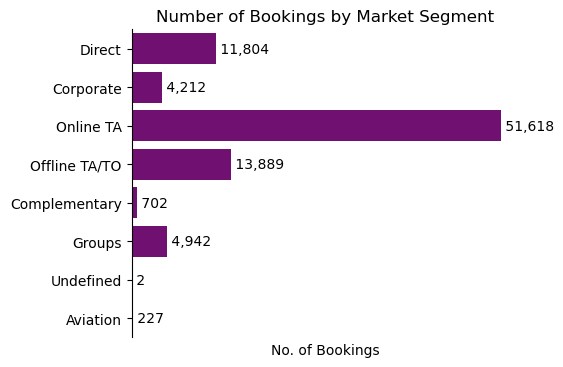

In [7]:
# Set plot size
plt.figure(figsize=(5,4))

# Plot bar chart
barr = sns.countplot(data=htb, y='market_segment', color='Purple')
plt.bar_label(barr.containers[0], fmt=' {:,.0f}') # add bar label

# Plot styling
plt.xlabel('No. of Bookings')
plt.ylabel('')
plt.xticks([])
sns.despine(bottom=True)
plt.title('Number of Bookings by Market Segment')

plt.show()

***Q3: What is the cancellation rate across different market segments and distribution channels?***

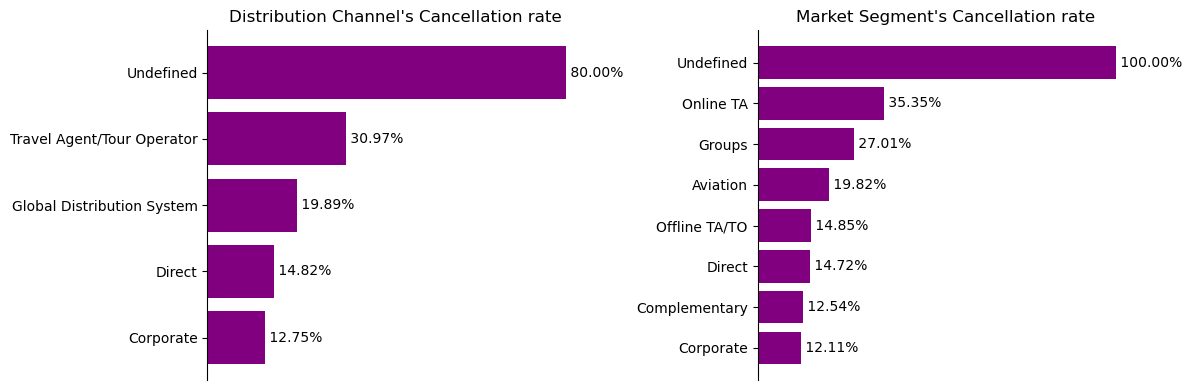

In [8]:
# Get Cancel Rate for Distribution Channel and Market Segment
channel_cancel = htb.groupby('distribution_channel')['is_canceled'].mean().sort_values()
segment_cancel = htb.groupby('market_segment')['is_canceled'].mean().sort_values()

# Set no. of subplots and plot size
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plot first chart on axis[0]
bar1 = ax[0].barh(channel_cancel.index, channel_cancel.values, color='purple')
ax[0].bar_label(bar1, labels=[f' {val*100:.2f}%' for val in bar1.datavalues])   # add bar labels
ax[0].set_title('Distribution Channel\'s Cancellation rate')    # set subplot title
ax[0].set_xticks([])    # remove ticks on x-axis

# Plot second chart on axis[1]
bar2 = ax[1].barh(segment_cancel.index, segment_cancel.values, color='purple')
ax[1].bar_label(bar2, labels=[f' {val*100:.2f}%' for val in bar2.datavalues])   # add bar labels
ax[1].set_title('Market Segment\'s Cancellation rate')  # set subplot title
ax[1].set_xticks([])    # remove ticks on x-axis

plt.tight_layout() # Auto adjust plot and elements to fix
sns.despine(bottom=True)    # Remove chart border

plt.show()

***Q4: How does lead time differ by market segment and distribution channels?***

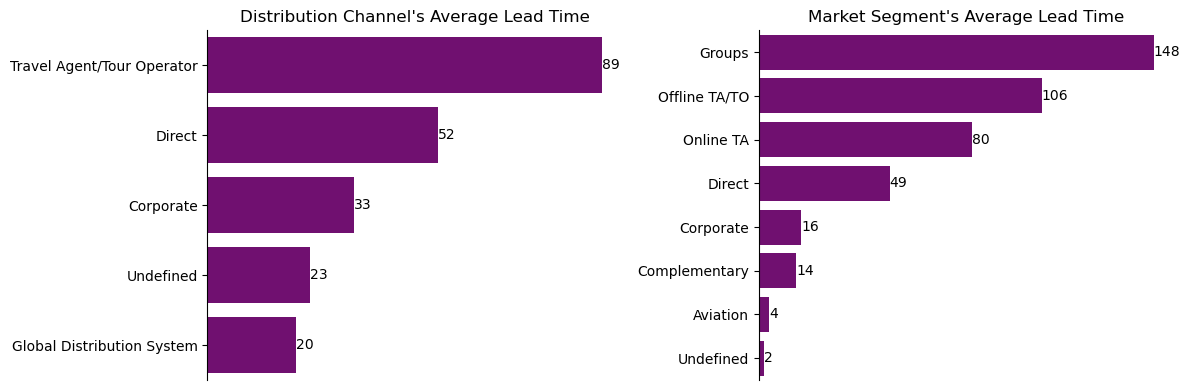

In [9]:
# Get Average Lead Time for Distribution Channel and Market Segment
channel_lead = htb.groupby('distribution_channel')['lead_time'].mean().sort_values(ascending=False).round()
segment_lead = htb.groupby('market_segment')['lead_time'].mean().sort_values(ascending=False).round()

# Set no. of subplots and plot size
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plot first chart on axis[0]
chn_bar = sns.barplot(x=channel_lead.values, y=channel_lead.index, ax=ax[0], color='purple')
ax[0].bar_label(chn_bar.containers[0])  # add bar labels
ax[0].set_title('Distribution Channel\'s Average Lead Time') # set subplot title
ax[0].set_xticks([])    # remove ticks on x-axis
ax[0].set_ylabel('')    # remove label on y-axis

# Plot second chart on axis[1]
seg_bar = sns.barplot(x=segment_lead.values, y=segment_lead.index, ax=ax[1], color='purple')
ax[1].bar_label(seg_bar.containers[0]) # add bar labels
ax[1].set_title('Market Segment\'s Average Lead Time')  # set subplot title
ax[1].set_xticks([])    # remove ticks on x-axis
ax[1].set_ylabel('')    # remove label on y-axis

plt.tight_layout() # Auto adjust plot and elements to fix
sns.despine(bottom=True)    # Remove chart border

plt.show()

***Q5: Is there a relationship between Lead time and cancellation rate across different channels?***

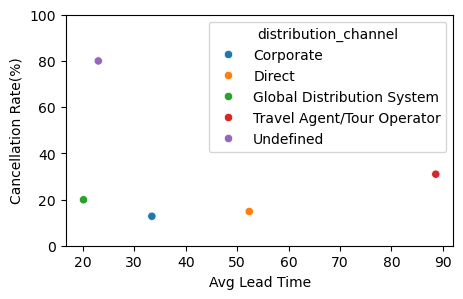

In [17]:
# Get Average Lead Time and Cancel Rate for Distrinution channels
channel_metric = htb.groupby('distribution_channel').agg({'lead_time':'mean', 'is_canceled':'mean'})

# Xply 'is_canceled' column by 100
channel_metric['is_canceled'] = channel_metric['is_canceled'] * 100

plt.figure(figsize=(5,3)) # set plot size

# Plot ScatterPlot
sns.scatterplot(data= channel_metric, x='lead_time', y='is_canceled', hue=channel_metric.index)

# Plot styling
plt.xlabel('Avg Lead Time')
plt.ylabel('Cancellation Rate(%)')
plt.ylim(0, 100)

plt.show()

***Q6: How does the Average Daily Rate (ADR) vary by distribution channel and market segment?***

*Note: ADR (Average Daily Rate) reflects actual revenue per night, so only guests who completed their stay (i.e., reservation_status = 'Check-Out') are considered in the calculation.*

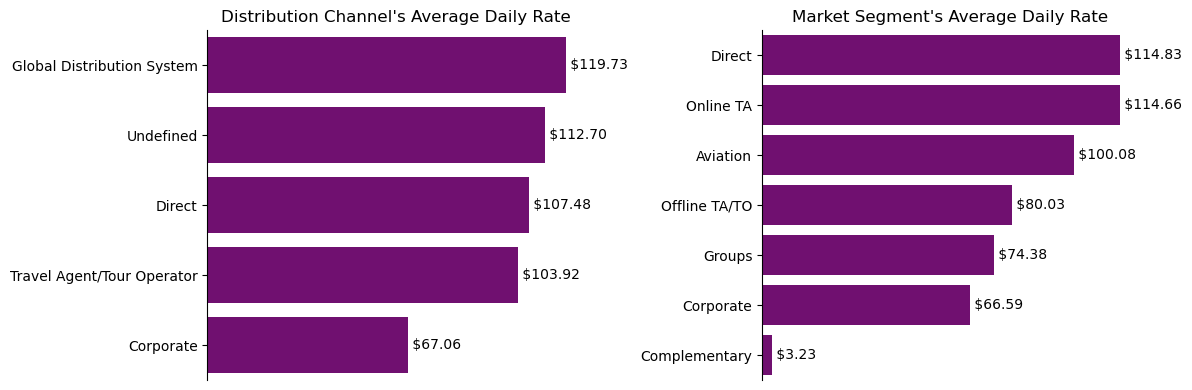

In [19]:
# Filter data for only bookings that checked-out
check_outs = htb[htb['reservation_status']=='Check-Out'].copy()
# Preview data
check_outs.head()

# Get Mean of ADR for Distribution Channel and Market Segment
channel_adr = check_outs.groupby('distribution_channel')['avg_daily_rate'].mean().sort_values(ascending=False)
segment_adr = check_outs.groupby('market_segment')['avg_daily_rate'].mean().sort_values(ascending=False)

# Set no. of subplots and plot size
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plot first chart on axis[0]
chn_adr = sns.barplot(x=channel_adr.values, y=channel_adr.index, ax=ax[0], color='purple')
ax[0].bar_label(chn_adr.containers[0], fmt=' ${:.2f}')    # add bar labels
ax[0].set_title('Distribution Channel\'s Average Daily Rate')   # set subplot title
ax[0].set_xticks([])    # remove ticks on x-axis
ax[0].set_ylabel('')    # remove label on y-axis

# Plot second chart on axis[1]
seg_adr = sns.barplot(x=segment_adr.values, y=segment_adr.index, ax=ax[1], color='purple')
ax[1].bar_label(seg_adr.containers[0], fmt=' ${:.2f}')    # add bar labels
ax[1].set_title('Market Segment\'s Average Daily Rate') # set subplot title
ax[1].set_xticks([])    # remove ticks on x-axis
ax[1].set_ylabel('')    # remove label on y-axis

plt.tight_layout() # Auto adjust plot and elements to fix
sns.despine(bottom=True)    # Remove chart border

plt.show()

***Q7: Are there any channels or market segments linked to longer average stays?***

*Note: For stays, we only consider Guest that actually arrived and checked-out, excluding canceled or No-Show bookings*<br>
*Therefore, we use the **Check-outs** dataframe*

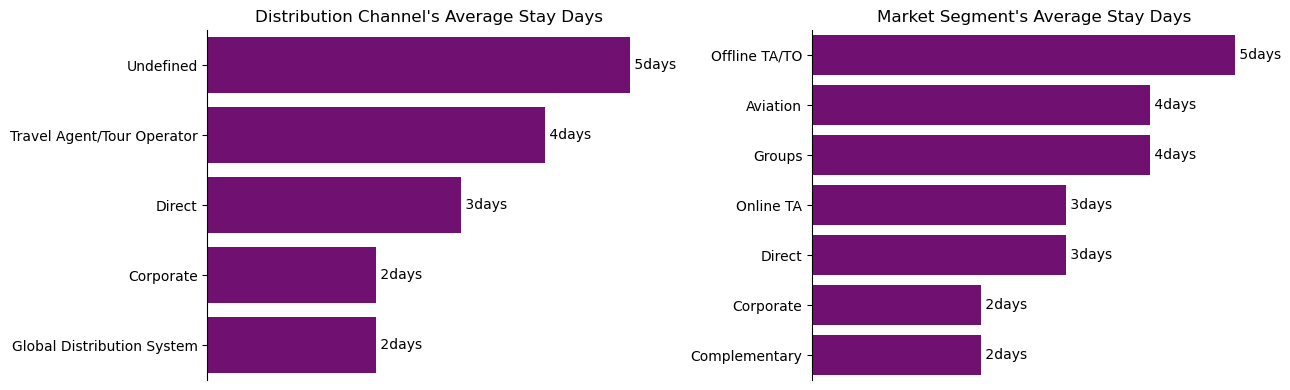

In [20]:
# New column: get total no of stay
check_outs['total_stay'] = check_outs['stays_in_weekend_nights'] + check_outs['stays_in_week_nights']

# # Get Average Stay Days for Distribution Channel and Market Segment
channel_stay = check_outs.groupby('distribution_channel')['total_stay'].mean().sort_values(ascending=False).round()
segment_stay = check_outs.groupby('market_segment')['total_stay'].mean().sort_values(ascending=False).round()

# Set no. of subplots and plot size
fig, ax = plt.subplots(1,2, figsize=(13,4)) 

# # Plot first chart on axis[0]
chn_stay = sns.barplot(x=channel_stay.values, y=channel_stay.index, ax=ax[0], color='purple')
ax[0].bar_label(chn_stay.containers[0], fmt=' {:.0f}days')  # add bar labels
ax[0].set_title('Distribution Channel\'s Average Stay Days')    # set subplot title
ax[0].set_xticks([])    # remove ticks on x-axis
ax[0].set_ylabel('')    # remove label on y-axis

# Plot second chart on axis[1]
seg_stay = sns.barplot(x=segment_stay.values, y=segment_stay.index, ax=ax[1], color='purple')
ax[1].bar_label(seg_stay.containers[0], fmt=' {:.0f}days')  # add bar labels
ax[1].set_title('Market Segment\'s Average Stay Days')  # set subplot title
ax[1].set_xticks([])    # remove ticks on x-axis
ax[1].set_ylabel('')    # remove label on y-axis

plt.tight_layout() # Auto adjust plot and elements to fix
sns.despine(bottom=True)    # Remove chart border

plt.show()

***Q8: Do top market segments show seasonal booking patterns?***

In [13]:
# Function to group month into respective seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create a new column 'season' using the above function
htb['season'] = htb['booking_date'].dt.month.map(get_season)

In [14]:
# Get top 3 market segment with bookings
top_segment = htb['market_segment'].value_counts().nlargest(3).index.to_list()
top_segment

['Online TA', 'Offline TA/TO', 'Direct']

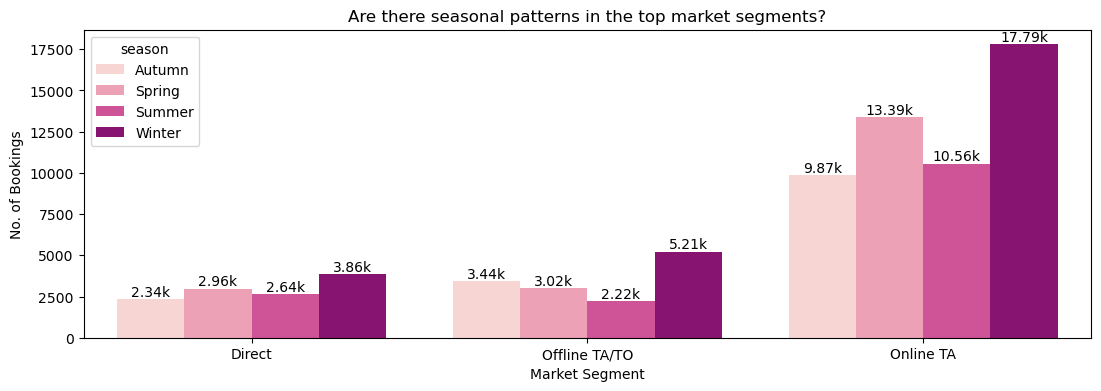

In [15]:
# Get no of bookings for market segments in each season
market_season = (htb[htb['market_segment'].isin(top_segment)] # filter data to only show top 3 market segment
                 .groupby(['market_segment', 'season']) # group by mkt_segment and season
                 .size()    # get count of bookings
                 .reset_index(name='bookings')  #reset index and rename value column
                 )

plt.figure(figsize=(13,4)) # set plot size

# Plot bar chart
x = sns.barplot(data=market_season, x='market_segment', y='bookings', hue='season', palette='RdPu')

# Loop through each bar and add labels
for bars in x.containers:
    plt.bar_label(bars, labels=[f'{val/1000:,.2f}k' if val >= 1000 else val for val in bars.datavalues]) # add and format labels

# Plot styling
plt.xlabel('Market Segment')
plt.ylabel('No. of Bookings')
plt.title('Are there seasonal patterns in the top market segments?')

plt.show()

***Q9: What are the most common combinations of market segment and distribution channel?***

In [16]:
htb.groupby(['distribution_channel', 'market_segment']).size().nlargest(5).reset_index(name='bookings')

,distribution_channel,market_segment,bookings
0,Travel Agent/Tour Operator,Online TA,51316
1,Travel Agent/Tour Operator,Offline TA/TO,13734
2,Direct,Direct,11490
3,Corporate,Corporate,3903
4,Travel Agent/Tour Operator,Groups,3622
